In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Train.csv')
test =pd.read_csv("Test.csv")

In [3]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


e:\pythonforselenium\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='time_spent'>

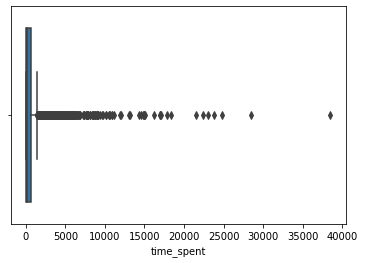

In [4]:
sns.boxplot(train['time_spent'])

In [5]:
train[train['time_spent']>27000].index

Int64Index([35, 964], dtype='int64')

In [6]:
# dropping these values lead to good score hence droping also these can be termed as outliers
train.drop(train[train['time_spent']>27000].index,axis=0,inplace=True)

<AxesSubplot:xlabel='session_number', ylabel='time_spent'>

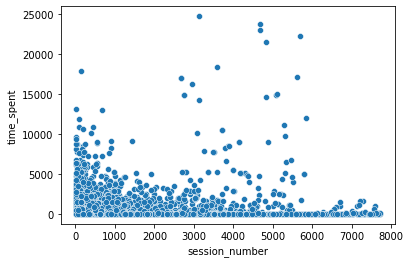

In [7]:
sns.scatterplot(x=train['session_number'],y=train['time_spent'])

In [8]:
from sklearn.metrics import mean_squared_log_error, make_scorer
def rmsle(true_y, predicted_y):
    true_y =np.abs(true_y)
    predicted_y =np.abs(predicted_y)
    score = mean_squared_log_error(true_y,predicted_y)
    return np.sqrt(score)
RMSLE=make_scorer(rmsle)

In [9]:
train['date'] = pd.to_datetime(train.date, format='%Y-%m-%d')
test['date'] = pd.to_datetime(test.date, format='%Y-%m-%d')

In [10]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.week
train['Day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek

e:\pythonforselenium\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.week
test['Day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek

e:\pythonforselenium\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
def return_initial(s):
  t=s.split('-')
  return t[0]

train['device_details_name']=train['device_details'].apply(return_initial)
test['device_details_name']=test['device_details'].apply(return_initial)

In [13]:
def return_last(s):
  t=s.split('-')
  return t[1]

train['device_details_browser']=train['device_details'].apply(return_last)
test['device_details_browser']=test['device_details'].apply(return_last)

In [14]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,year,month,week,Day,dayofweek,device_details_name,device_details_browser
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,2020,1,4,22,2,Desktop,Chrome
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,2020,2,9,27,3,iPhone,iOS
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,2019,8,31,1,3,iPhone,MobileWeb
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,2019,12,1,30,0,Desktop,IE
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,2019,9,37,10,1,iPhone,Web


In [15]:
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,year,month,week,Day,dayofweek,device_details_name,device_details_browser
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0,2020,1,2,7,1,Desktop,IE
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0,2020,2,7,13,3,Android Phone,Android
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0,2019,10,42,14,0,iPhone,iOS
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0,2020,1,4,26,6,Desktop,IE
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0,2020,1,5,29,2,Desktop,Chrome


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
for column in ['device_details','device_details_name','device_details_browser']:
    train[column]=le.fit_transform(train[column])
    test[column]=le.fit_transform(test[column])

In [18]:
# Determine  recency column steps

In [19]:
train['date'].max()

Timestamp('2020-04-23 00:00:00')

In [20]:
test['date'].max()

Timestamp('2020-04-19 00:00:00')

In [21]:
import datetime as dt
today_date = dt.date(2020,4,23)

In [22]:
today_date

datetime.date(2020, 4, 23)

In [23]:
train['date'] = pd.DatetimeIndex(train.date).date
test['date'] = pd.DatetimeIndex(test.date).date

In [24]:
train['Recency'] = train.date.apply(lambda x : (today_date - x).days)
test['Recency'] = test.date.apply(lambda x : (today_date - x).days)

In [25]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,year,month,week,Day,dayofweek,device_details_name,device_details_browser,Recency
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6,2020-01-22,1,0,0,236.886,2020,1,4,22,2,2,1,92
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,16,2020-02-27,1,0,0,1277.455,2020,2,9,27,3,6,8,56
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,14,2019-08-01,0,0,0,21.704,2019,8,31,1,3,6,4,266
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,8,2019-12-30,0,1,0,455.201,2019,12,1,30,0,2,3,115
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,15,2019-09-10,0,0,0,1164.877,2019,9,37,10,1,6,7,226


In [26]:
cat_features=['session_number','device_details','purchased','added_in_cart','checked_out','year','month','week','Day','dayofweek',
              'device_details_name','device_details_browser']

In [27]:
train.shape, test.shape

((5427, 17), (2327, 16))

In [28]:
train.drop(['date','session_id','client_agent'],axis=1, inplace=True)
test.drop(['date','session_id','client_agent'],axis=1, inplace=True)

In [29]:
train.shape, test.shape

((5427, 14), (2327, 13))

In [30]:
X_train = train.drop('time_spent', axis=1)
y_train = train['time_spent']

In [31]:
X_train['time_spent']=y_train

In [32]:
list(X_train['device_details'].unique())

[6, 16, 14, 8, 15, 0, 7, 5, 12, 10, 9, 2, 13, 1, 11, 3, 4]

In [33]:
X_train[X_train['device_details']==6]['time_spent'].mean()

660.397282208589

In [34]:
X_test=test

In [35]:
def mean_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].mean()
    var_dict.update([(item,value)])
  return var_dict

In [36]:
for tar in ['time_spent']:
  for var in cat_features:
    X_train[var+'_mean']=X_train[var].map(mean_encoder(var,tar))
    X_test[var+'_mean']=X_test[var].map(mean_encoder(var,tar))

In [37]:
X_train.drop('time_spent',axis=1,inplace=True)

In [38]:
X_train.shape, X_test.shape

((5427, 25), (2327, 25))

In [39]:
X_train.head()

,session_number,device_details,purchased,added_in_cart,checked_out,year,month,week,Day,dayofweek,...,purchased_mean,added_in_cart_mean,checked_out_mean,year_mean,month_mean,week_mean,Day_mean,dayofweek_mean,device_details_name_mean,device_details_browser_mean
0,715,6,1,0,0,2020,1,4,22,2,...,1453.933807,498.931024,614.799076,575.85058,550.825790,504.413121,596.048368,534.805221,768.257231,660.397282
1,55,16,1,0,0,2020,2,9,27,3,...,1453.933807,498.931024,614.799076,575.85058,588.514971,540.834182,574.771513,629.013922,613.159975,722.724864
2,11,14,0,0,0,2019,8,31,1,3,...,499.090502,498.931024,614.799076,678.67225,495.372718,565.886234,446.278803,629.013922,613.159975,258.902440
3,2794,8,0,1,0,2019,12,1,30,0,...,499.090502,1438.464703,614.799076,678.67225,484.079435,541.603794,616.939645,677.894517,768.257231,716.524606
4,3674,15,0,0,0,2019,9,37,10,1,...,499.090502,498.931024,614.799076,678.67225,1146.587691,1757.023726,755.781229,666.435814,613.159975,544.725132


In [40]:
X_test.isnull().sum()

session_number                   0
device_details                   0
purchased                        0
added_in_cart                    0
checked_out                      0
year                             0
month                            0
week                             0
Day                              0
dayofweek                        0
device_details_name              0
device_details_browser           0
Recency                          0
session_number_mean            101
device_details_mean              0
purchased_mean                   0
added_in_cart_mean               0
checked_out_mean                 0
year_mean                        0
month_mean                       0
week_mean                        1
Day_mean                         0
dayofweek_mean                   0
device_details_name_mean         0
device_details_browser_mean      0
dtype: int64

In [42]:
for cols in X_test.columns:
    try:
        X_test[cols].replace([np.inf,-np.inf],np.nan,inplace=True)
        X_test[cols]=X_test[cols].fillna(np.mean(X_test[cols]))
    except:
        continue

In [43]:
!pip3 install catboost

In [48]:
import catboost as cb
from sklearn.model_selection import GridSearchCV

In [49]:
cb_params={'depth':[2,3],'learning_rate':np.linspace(0.0001,0.001,15),'iterations':[3,4,5,6]}

In [50]:
cb_grid=GridSearchCV(estimator=cb.CatBoostRegressor(verbose=0),param_grid=cb_params,scoring=RMSLE,cv=3,verbose=2)

In [52]:
cb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   1.7s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.3s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.2s
[CV] depth=2, iterations=3, learning_rate=0.0001642857142857143 ......
[CV]  depth=2, iterations=3, learning_rate=0.0001642857142857143, total=   0.2s
[CV] depth=2, iterations=3, learning_rate=0.0001642857142857143 ......
[CV]  depth=2, iterations=3, learning_rate=0.0001642857142857143, total=   0.3s
[CV] depth=2, iterations=3, learning_rate=0.0001642857142857143 ......
[CV]  depth=2, iterations=3, learning_rate=0.0001642857142857143, total=   0.2s
[CV] depth=2, iterations=3, learning_rate=0.00022857142857142857 .....
[CV]  depth=2, iterations=3, learning_rate=0.00022857142857142857, total=   0.2s
[CV] depth=2, iterations=3, learning_rate=0.00022857142857142857 .....
[CV]  depth=2, iterations=3, learning_rate=0.00022857142857142857, total=   0.2s
[CV] depth=2, iterations=3, le

[CV]  depth=2, iterations=4, learning_rate=0.0002928571428571429, total=   0.2s
[CV] depth=2, iterations=4, learning_rate=0.00035714285714285714 .....
[CV]  depth=2, iterations=4, learning_rate=0.00035714285714285714, total=   0.2s
[CV] depth=2, iterations=4, learning_rate=0.00035714285714285714 .....
[CV]  depth=2, iterations=4, learning_rate=0.00035714285714285714, total=   0.6s
[CV] depth=2, iterations=4, learning_rate=0.00035714285714285714 .....
[CV]  depth=2, iterations=4, learning_rate=0.00035714285714285714, total=   0.2s
[CV] depth=2, iterations=4, learning_rate=0.00042142857142857146 .....
[CV]  depth=2, iterations=4, learning_rate=0.00042142857142857146, total=   0.2s
[CV] depth=2, iterations=4, learning_rate=0.00042142857142857146 .....
[CV]  depth=2, iterations=4, learning_rate=0.00042142857142857146, total=   0.2s
[CV] depth=2, iterations=4, learning_rate=0.00042142857142857146 .....
[CV]  depth=2, iterations=4, learning_rate=0.00042142857142857146, total=   0.9s
[CV] dep

[CV] ..... depth=2, iterations=5, learning_rate=0.00055, total=   0.3s
[CV] depth=2, iterations=5, learning_rate=0.00055 ....................
[CV] ..... depth=2, iterations=5, learning_rate=0.00055, total=   0.3s
[CV] depth=2, iterations=5, learning_rate=0.00055 ....................
[CV] ..... depth=2, iterations=5, learning_rate=0.00055, total=   0.2s
[CV] depth=2, iterations=5, learning_rate=0.0006142857142857143 ......
[CV]  depth=2, iterations=5, learning_rate=0.0006142857142857143, total=   0.2s
[CV] depth=2, iterations=5, learning_rate=0.0006142857142857143 ......
[CV]  depth=2, iterations=5, learning_rate=0.0006142857142857143, total=   0.2s
[CV] depth=2, iterations=5, learning_rate=0.0006142857142857143 ......
[CV]  depth=2, iterations=5, learning_rate=0.0006142857142857143, total=   0.3s
[CV] depth=2, iterations=5, learning_rate=0.0006785714285714287 ......
[CV]  depth=2, iterations=5, learning_rate=0.0006785714285714287, total=   0.2s
[CV] depth=2, iterations=5, learning_rate

[CV]  depth=2, iterations=6, learning_rate=0.000742857142857143, total=   0.3s
[CV] depth=2, iterations=6, learning_rate=0.000742857142857143 .......
[CV]  depth=2, iterations=6, learning_rate=0.000742857142857143, total=   0.2s
[CV] depth=2, iterations=6, learning_rate=0.0008071428571428572 ......
[CV]  depth=2, iterations=6, learning_rate=0.0008071428571428572, total=   0.2s
[CV] depth=2, iterations=6, learning_rate=0.0008071428571428572 ......
[CV]  depth=2, iterations=6, learning_rate=0.0008071428571428572, total=   0.2s
[CV] depth=2, iterations=6, learning_rate=0.0008071428571428572 ......
[CV]  depth=2, iterations=6, learning_rate=0.0008071428571428572, total=   0.3s
[CV] depth=2, iterations=6, learning_rate=0.0008714285714285715 ......
[CV]  depth=2, iterations=6, learning_rate=0.0008714285714285715, total=   0.5s
[CV] depth=2, iterations=6, learning_rate=0.0008714285714285715 ......
[CV]  depth=2, iterations=6, learning_rate=0.0008714285714285715, total=   0.3s
[CV] depth=2, it

[CV]  depth=3, iterations=3, learning_rate=0.0009357142857142858, total=   0.2s
[CV] depth=3, iterations=3, learning_rate=0.001 ......................
[CV] ....... depth=3, iterations=3, learning_rate=0.001, total=   0.2s
[CV] depth=3, iterations=3, learning_rate=0.001 ......................
[CV] ....... depth=3, iterations=3, learning_rate=0.001, total=   0.3s
[CV] depth=3, iterations=3, learning_rate=0.001 ......................
[CV] ....... depth=3, iterations=3, learning_rate=0.001, total=   0.2s
[CV] depth=3, iterations=4, learning_rate=0.0001 .....................
[CV] ...... depth=3, iterations=4, learning_rate=0.0001, total=   0.3s
[CV] depth=3, iterations=4, learning_rate=0.0001 .....................
[CV] ...... depth=3, iterations=4, learning_rate=0.0001, total=   0.2s
[CV] depth=3, iterations=4, learning_rate=0.0001 .....................
[CV] ...... depth=3, iterations=4, learning_rate=0.0001, total=   0.2s
[CV] depth=3, iterations=4, learning_rate=0.0001642857142857143 ....

[CV]  depth=3, iterations=5, learning_rate=0.00022857142857142857, total=   0.2s
[CV] depth=3, iterations=5, learning_rate=0.00022857142857142857 .....
[CV]  depth=3, iterations=5, learning_rate=0.00022857142857142857, total=   0.2s
[CV] depth=3, iterations=5, learning_rate=0.00022857142857142857 .....
[CV]  depth=3, iterations=5, learning_rate=0.00022857142857142857, total=   0.2s
[CV] depth=3, iterations=5, learning_rate=0.0002928571428571429 ......
[CV]  depth=3, iterations=5, learning_rate=0.0002928571428571429, total=   0.2s
[CV] depth=3, iterations=5, learning_rate=0.0002928571428571429 ......
[CV]  depth=3, iterations=5, learning_rate=0.0002928571428571429, total=   0.2s
[CV] depth=3, iterations=5, learning_rate=0.0002928571428571429 ......
[CV]  depth=3, iterations=5, learning_rate=0.0002928571428571429, total=   0.2s
[CV] depth=3, iterations=5, learning_rate=0.00035714285714285714 .....
[CV]  depth=3, iterations=5, learning_rate=0.00035714285714285714, total=   0.2s
[CV] depth

[CV]  depth=3, iterations=6, learning_rate=0.00042142857142857146, total=   0.4s
[CV] depth=3, iterations=6, learning_rate=0.00042142857142857146 .....
[CV]  depth=3, iterations=6, learning_rate=0.00042142857142857146, total=   0.2s
[CV] depth=3, iterations=6, learning_rate=0.0004857142857142857 ......
[CV]  depth=3, iterations=6, learning_rate=0.0004857142857142857, total=   0.2s
[CV] depth=3, iterations=6, learning_rate=0.0004857142857142857 ......
[CV]  depth=3, iterations=6, learning_rate=0.0004857142857142857, total=   0.2s
[CV] depth=3, iterations=6, learning_rate=0.0004857142857142857 ......
[CV]  depth=3, iterations=6, learning_rate=0.0004857142857142857, total=   0.2s
[CV] depth=3, iterations=6, learning_rate=0.00055 ....................
[CV] ..... depth=3, iterations=6, learning_rate=0.00055, total=   0.3s
[CV] depth=3, iterations=6, learning_rate=0.00055 ....................
[CV] ..... depth=3, iterations=6, learning_rate=0.00055, total=   0.2s
[CV] depth=3, iterations=6, le

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.7min finished


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001BA6FCFFF48>,
             param_grid={'depth': [2, 3], 'iterations': [3, 4, 5, 6],
                         'learning_rate': array([0.0001    , 0.00016429, 0.00022857, 0.00029286, 0.00035714,
       0.00042143, 0.00048571, 0.00055   , 0.00061429, 0.00067857,
       0.00074286, 0.00080714, 0.00087143, 0.00093571, 0.001     ])},
             scoring=make_scorer(rmsle), verbose=2)

In [53]:
cb_grid.best_params_

{'depth': 2, 'iterations': 3, 'learning_rate': 0.0001}

In [54]:
e=2.7182818284590452353602874713527

In [55]:
cb_model=cb.CatBoostRegressor(depth=2,iterations=3,learning_rate=0.00001,verbose=0)

In [56]:
cb_model.fit(X_train,np.log1p(y_train))

In [57]:
cb_preds=cb_model.predict(X_test)

In [58]:
cb_preds_df=pd.DataFrame(data=e**(cb_preds),columns=['time_spent'])

In [59]:
cb_preds_df.head()

,time_spent
0,137.922744
1,137.914725
2,137.922744
3,137.914725
4,137.914725


In [60]:
cb_preds_df['time_spent'].unique()

array([137.9227438 , 137.91472481, 137.92291336, 137.92813243])

In [61]:
cb_preds_df.to_csv('cb6.csv',index=False)